<h1>Segmenting and Clustering Neighborhoods in Toronto</h1>

<h2>Part 1, Creation of Dataframe</h2>
<p>For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.
<ol>
    <li>Start by creating a new Notebook for this assignment.</li>
    <li>Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe</li>
    <li> To create the above dataframe:</li>
    <ul>
        <li>The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood</li>
        <li>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.</li>
        <li>More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.</li>
        <li>If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.</li>
        <li>Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.</li>
        <li>In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.</li>
    </ul>
    <li>Submit a link to your Notebook on your Github repository.(10 marks)</li>
</ol>

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas  to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.
</p>


<p>Old Link for Wikipedia Page: https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969</p>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request

In [2]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969"
table_html = requests.get(url).text

In [3]:
soup = BeautifulSoup(table_html, 'html5lib')

<!--page_table = urllib.request.urlopen(url)
data_soup = BeautifulSoup(page_table.read())
tables = data_soup.findChildren('table')
tables--%>

In [4]:
tables = soup.find_all('table')
len(tables)

3

In [5]:
for index,table in enumerate(tables):
    if ("wikitable sortable" in str(table)):
        table_index = index
print(table_index)

0


In [6]:
table_data = pd.DataFrame(columns=["Postcode", "Borough", "neighborhood"])

for row in tables[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Postcode = col[0].text
        Borough = col[1].text
        neighborhood = col[2].text.strip()
        table_data = table_data.append({"Postcode":Postcode, "Borough":Borough, "neighborhood":neighborhood}, ignore_index=True)

table_data

Postcode             Borough  \
0      M1A\n      Not assigned\n   
1      M2A\n      Not assigned\n   
2      M3A\n        North York\n   
3      M4A\n        North York\n   
4      M5A\n  Downtown Toronto\n   
..       ...                 ...   
175    M5Z\n      Not assigned\n   
176    M6Z\n      Not assigned\n   
177    M7Z\n      Not assigned\n   
178    M8Z\n         Etobicoke\n   
179    M9Z\n      Not assigned\n   

                                          neighborhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

In [7]:
table_data['Postcode']=table_data['Postcode'].str.replace('\n', '')
table_data['Borough']=table_data['Borough'].str.replace('\n', '')
table_data.drop(table_data.loc[table_data['Borough']=="Not assigned"].index, inplace=True)
table_data.reset_index(drop=True) #does not save a new index column
table_data.head()

Postcode           Borough                                 neighborhood
2      M3A        North York                                    Parkwoods
3      M4A        North York                             Victoria Village
4      M5A  Downtown Toronto                    Regent Park, Harbourfront
5      M6A        North York             Lawrence Manor, Lawrence Heights
6      M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [8]:
table_data.shape

(103, 3)

<h2>Part 2, Location Determination</h2>
<p>
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code.
</p>


<p><b>Important Note:</b> There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below</p>

In [9]:
geoLocation= pd.read_csv("D:\Desktop\pythonLearning\Coursera_Capstone\Geospatial_Coordinates.csv")

In [10]:
geoLocation.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [11]:
geoLocation.sort_values('Postal Code', ascending= True, ignore_index=True)
geoLocation.shape

(103, 3)

In [12]:
table_data = table_data.sort_values('Postcode', ascending= True, ignore_index = True)

In [13]:
table_data.head()

Postcode      Borough                            neighborhood
0      M1B  Scarborough                          Malvern, Rouge
1      M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2      M1E  Scarborough       Guildwood, Morningside, West Hill
3      M1G  Scarborough                                  Woburn
4      M1H  Scarborough                               Cedarbrae

In [14]:
table_data['Latitude']=geoLocation['Latitude'].values
table_data['Longitude']=geoLocation['Longitude'].values
table_data.head()

Postcode      Borough                            neighborhood   Latitude  \
0      M1B  Scarborough                          Malvern, Rouge  43.806686   
1      M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2      M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3      M1G  Scarborough                                  Woburn  43.770992   
4      M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [15]:
table_data.shape

(103, 5)

<h2>Part 3, Clustering of Data</h2>
<p>
Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:
<ul>
    <li>to add enough Markdown cells to explain what you decided to do and to report any observations you make.</li>
    <li>to generate maps to visualize your neighborhoods and how they cluster together. </li>
</ul>
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)
</p>

In [16]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library


In [17]:
address = 'Tronto, CA'

geolocator = Nominatim(user_agent="CA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 45.5931534, 10.2256618.


In [18]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(table_data['Latitude'], table_data['Longitude'], table_data['Borough'], table_data['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

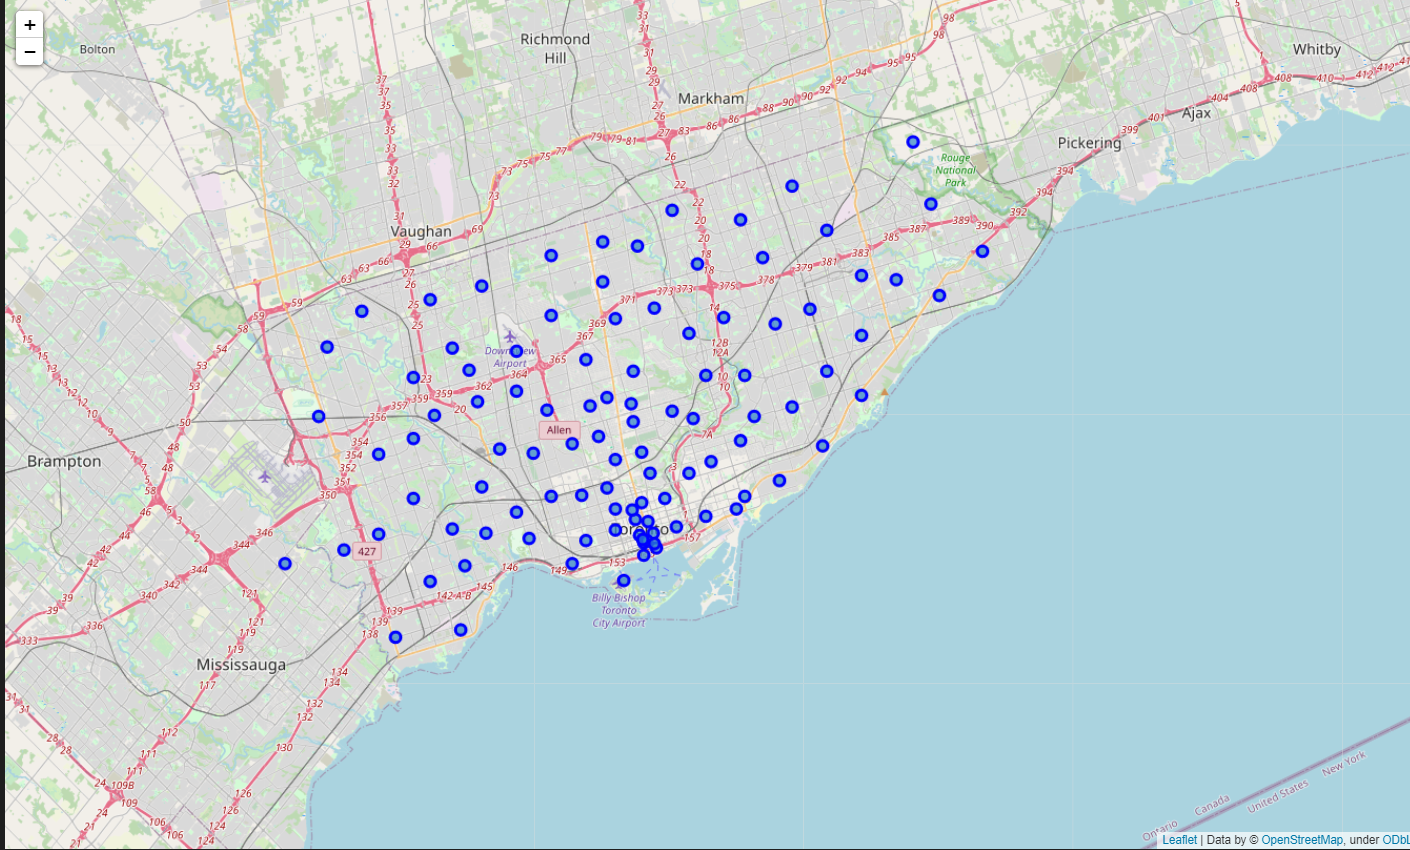

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= r"C:\Users\jose\Pictures\Screenshots\Screenshot (1939).png",  width=1400, height=900)

In [ ]:
#This is a snippet of the original code used. This will not be ran in order to hide my API ID and Secret
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [21]:
neighborhood_latitude = table_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = table_data.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = table_data.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Malvern, Rouge are 43.8066863, -79.1943534.


In [22]:
radius = 750 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [23]:
results = requests.get(url).json()  

<p> "From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab."</p>

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-25-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name                     categories        lat        lng
0   Images Salon & Spa                            Spa  43.802283 -79.198565
1              Wendy’s           Fast Food Restaurant  43.807448 -79.199056
2              Wendy's           Fast Food Restaurant  43.802008 -79.198080
3  Staples Morningside  Paper / Office Supplies Store  43.800285 -79.196607
4          Tim Hortons                    Coffee Shop  43.802000 -79.198169

In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
toronto_venues = getNearbyVenues(names=table_data['neighborhood'],
                                   latitudes=table_data['Latitude'],
                                   longitudes=table_data['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [29]:
print(toronto_venues.shape)
toronto_venues.head()

(3653, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Malvern, Rouge              43.806686              -79.194353   
1  Malvern, Rouge              43.806686              -79.194353   
2  Malvern, Rouge              43.806686              -79.194353   
3  Malvern, Rouge              43.806686              -79.194353   
4  Malvern, Rouge              43.806686              -79.194353   

                 Venue  Venue Latitude  Venue Longitude  \
0   Images Salon & Spa       43.802283       -79.198565   
1              Wendy’s       43.807448       -79.199056   
2              Wendy's       43.802008       -79.198080   
3  Staples Morningside       43.800285       -79.196607   
4          Tim Hortons       43.802000       -79.198169   

                  Venue Category  
0                            Spa  
1           Fast Food Restaurant  
2           Fast Food Restaurant  
3  Paper / Office Supplies Store  
4                    Coffee Shop

In [30]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                             
Agincourt                                                           13   
Alderwood, Long Branch                                              11   
Bathurst Manor, Wilson Heights, Downsview North                     27   
Bayview Village                                                     10   
Bedford Park, Lawrence Manor East                                   35   
...                                                                ...   
Willowdale, Willowdale West                                          6   
Woburn                                                               5   
Woodbine Heights                                                    10   
York Mills West                                                      4   
York Mills, Silver Hills                                             1   

                                                 Neighborhood Longitude  \
Neighborhood                                                              
Agincourt                                                            13   
Alderwood, Long Branch                                               11   
Bathurst Manor, Wilson Heights, Downsview North                      27   
Bayview Village                                                      10   
Bedford Park, Lawrence Manor East                                    35   
...                                                                 ...   
Willowdale, Willowdale West                                           6   
Woburn                                                                5   
Woodbine Heights                                                     10   
York Mills West                                                       4   
York Mills, Silver Hills                                              1   

                                                 Venue  Venue Latitude  \
Neighborhood                                                             
Agincourt                                           13              13   
Alderwood, Long Branch                              11              11   
Bathurst Manor, Wilson Heights, Downsview North     27              27   
Bayview Village                                     10              10   
Bedford Park, Lawrence Manor East                   35              35   
...                                                ...             ...   
Willowdale, Willowdale West                          6               6   
Woburn                                               5               5   
Woodbine Heights                                    10              10   
York Mills West                                      4               4   
York Mills, Silver Hills                             1               1   

                                                 Venue Longitude  \
Neighborhood                                                       
Agincourt                                                     13   
Alderwood, Long Branch                                        11   
Bathurst Manor, Wilson Heights, Downsview North               27   
Bayview Village                                               10   
Bedford Park, Lawrence Manor East                             35   
...                                                          ...   
Willowdale, Willowdale West                                    6   
Woburn                                                         5   
Woodbine Heights                                              10   
York Mills West                                                4   
York Mills, Silver Hills                                       1   

                                                 Venue Category  
Neighborhood                                                     
Agincourt                                                    13  
Alderwood, Long Branch                                       11 

In [31]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 326 uniques categories.


In [32]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Gate  \
0                   0        0                   0             0   
1                   0        0                   0             0   
2                   0        0                   0             0   
3                   0        0                   0             0   
4                   0        0                   0             0   

   Airport Lounge  Airport Service  ...  University  \
0               0                0  ...           0   
1               0                0  ...           0   
2               0                0  ...           0   
3               0                0  ...           0   
4               0                0  ...           0   

   Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                              0                 0            0   
1                              0                 0            0   
2                              0                 0            0   
3                              0                 0            0   
4                              0                 0            0   

   Vietnamese Restaurant  Warehouse Store  Wine Bar  Wine Shop  Wings Joint  \
0                      0                0         0          0            0   
1                      0                0         0          0            0   
2                      0                0         0          0            0   
3                      0                0         0          0            0   
4                      0                0         0          0            0   

   Women's Store  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 326 columns]

In [33]:
toronto_onehot.shape

(3653, 326)

In [34]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

Neighborhood  Yoga Studio  \
0                                        Agincourt          0.0   
1                           Alderwood, Long Branch          0.0   
2  Bathurst Manor, Wilson Heights, Downsview North          0.0   
3                                  Bayview Village          0.0   
4                Bedford Park, Lawrence Manor East          0.0   

   Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                0.0             0.0                0.0                 0.0   
1                0.0             0.0                0.0                 0.0   
2                0.0             0.0                0.0                 0.0   
3                0.0             0.0                0.0                 0.0   
4                0.0             0.0                0.0                 0.0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  ...  University  \
0      0.0                 0.0           0.0             0.0  ...         0.0   
1      0.0                 0.0           0.0             0.0  ...         0.0   
2      0.0                 0.0           0.0             0.0  ...         0.0   
3      0.0                 0.0           0.0             0.0  ...         0.0   
4      0.0                 0.0           0.0             0.0  ...         0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                            0.0               0.0     0.000000   
1                            0.0               0.0     0.000000   
2                            0.0               0.0     0.000000   
3                            0.0               0.0     0.000000   
4                            0.0               0.0     0.028571   

   Vietnamese Restaurant  Warehouse Store  Wine Bar  Wine Shop  Wings Joint  \
0                    0.0              0.0       0.0        0.0     0.000000   
1                    0.0              0.0       0.0        0.0     0.000000   
2                    0.0              0.0       0.0        0.0     0.000000   
3                    0.0              0.0       0.0        0.0     0.000000   
4                    0.0              0.0       0.0        0.0     0.028571   

   Women's Store  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 326 columns]

In [35]:
toronto_grouped.shape

(98, 326)

In [36]:
num_top_venues = 5

for item in toronto_grouped['Neighborhood']:
    print("----"+item+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == item].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Discount Store  0.08
1                 Restaurant  0.08
2  Latin American Restaurant  0.08
3            Badminton Court  0.08
4         Seafood Restaurant  0.08


----Alderwood, Long Branch----
               venue  freq
0        Pizza Place  0.18
1  Convenience Store  0.18
2        Coffee Shop  0.09
3               Park  0.09
4     Sandwich Place  0.09


----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0        Coffee Shop  0.07
1        Pizza Place  0.07
2               Bank  0.07
3  Health Food Store  0.04
4      Shopping Mall  0.04


----Bayview Village----
                 venue  freq
0  Japanese Restaurant   0.2
1                 Bank   0.2
2                 Café   0.1
3   Chinese Restaurant   0.1
4         Skating Rink   0.1


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.09
2      Sandwich Place  0.06
3

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt        Discount Store   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North           Coffee Shop   
3                                  Bayview Village   Japanese Restaurant   
4                Bedford Park, Lawrence Manor East           Coffee Shop   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0            Restaurant  Latin American Restaurant       Badminton Court   
1     Convenience Store                Coffee Shop                  Park   
2           Pizza Place                       Bank     Health Food Store   
3                  Bank                       Café    Chinese Restaurant   
4    Italian Restaurant             Sandwich Place                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Seafood Restaurant        Sandwich Place                Lounge   
1        Sandwich Place            Donut Shop                   Gym   
2         Shopping Mall   Fried Chicken Joint      Sushi Restaurant   
3          Skating Rink          Intersection         Grocery Store   
4         Grocery Store      Greek Restaurant              Pharmacy   

  8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
0      Sushi Restaurant          Skating Rink              Supermarket  
1           Gas Station                   Pub  New American Restaurant  
2           Supermarket     Mobile Phone Shop              Bridal Shop  
3         Shopping Mall         Movie Theater          Organic Grocery  
4             Juice Bar       Thai Restaurant               Bagel Shop

In [39]:
neighborhoods_venues_sorted.shape

(98, 11)

<h3>Optimal Number of Clusters using the Elbow Method</h3>

<p>The code below will be used to analyze a rough optimal number of clusters for the data. 

The code was obtained from the blog "Tutorial: How to determine the optimal number of clusters for k-means clustering"
Link to blog:https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
</p>

In [40]:
import matplotlib.pyplot as plt

In [41]:
#define data
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

In [42]:
#loop through different cluster values
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

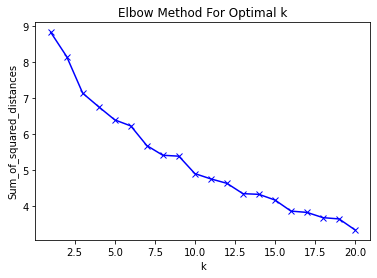

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<p>Decided to use 8 cluters as this was the number that had better distribution of places umong the clusters.</p>

In [44]:
# set number of clusters
kclusters = 8
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 2, 2, 0, 6, 6, 0, 6, 6, 6])

In [45]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabel', kmeans.labels_)

toronto_merge = table_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merge = toronto_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

toronto_merge.head() # check the last columns!

Postcode      Borough                            neighborhood   Latitude  \
0      M1B  Scarborough                          Malvern, Rouge  43.806686   
1      M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2      M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3      M1G  Scarborough                                  Woburn  43.770992   
4      M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  ClusterLabel 1st Most Common Venue 2nd Most Common Venue  \
0 -79.194353           6.0           Coffee Shop  Fast Food Restaurant   
1 -79.160497           0.0        Breakfast Spot                   Bar   
2 -79.188711           2.0  Fast Food Restaurant           Pizza Place   
3 -79.216917           3.0           Coffee Shop                  Park   
4 -79.239476           6.0     Indian Restaurant           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue          5th Most Common Venue  \
0                 Trail   Martial Arts School  Paper / Office Supplies Store   
1    Italian Restaurant          Burger Joint                    Music Venue   
2            Sports Bar           Coffee Shop                     Beer Store   
3      Business Service           Yoga Studio           Other Great Outdoors   
4           Yoga Studio  Gym / Fitness Center                    Flower Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Spa            Hobby Shop    African Restaurant   
1           Opera House                Office          Noodle House   
2            Restaurant        Breakfast Spot        Medical Center   
3          Optical Shop           Opera House                Office   
4          Burger Joint              Bus Line   Fried Chicken Joint   

   9th Most Common Venue   10th Most Common Venue  
0  Vietnamese Restaurant              Opera House  
1              Nightclub  New American Restaurant  
2                   Park                     Bank  
3           Noodle House                Nightclub  
4                 Lounge                     Bank

In [46]:
sumna=toronto_merge['ClusterLabel'].isna().sum()
if sumna != 0:
    print('Total number of rows without clusters is', sumna)

Total number of rows without clusters is 1


In [47]:
toronto_merge['ClusterLabel'].value_counts()

6.0    54
2.0    27
0.0    11
3.0     4
5.0     3
4.0     1
7.0     1
1.0     1
Name: ClusterLabel, dtype: int64

<p>The single row will be dropped as this will not really affect the over all representation of the data. Also, I changed the radius to 750m rather the original 500m as this is how far I will be willing to go either by vehicular transport or walking.

Additionally, When the radius was changed, the number of rows unassigned to a cluster reduced by 3</p>

In [48]:
toronto_merge.dropna(inplace=True)
toronto_merge.reset_index(drop=True)

Postcode      Borough                                       neighborhood  \
0        M1B  Scarborough                                     Malvern, Rouge   
1        M1C  Scarborough             Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough                  Guildwood, Morningside, West Hill   
3        M1G  Scarborough                                             Woburn   
4        M1H  Scarborough                                          Cedarbrae   
..       ...          ...                                                ...   
97       M9N         York                                             Weston   
98       M9P    Etobicoke                                          Westmount   
99       M9R    Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
100      M9V    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
101      M9W    Etobicoke                Northwest, West Humber - Clairville   

      Latitude  Longitude  ClusterLabel 1st Most Common Venue  \
0    43.806686 -79.194353           6.0           Coffee Shop   
1    43.784535 -79.160497           0.0        Breakfast Spot   
2    43.763573 -79.188711           2.0  Fast Food Restaurant   
3    43.770992 -79.216917           3.0           Coffee Shop   
4    43.773136 -79.239476           6.0     Indian Restaurant   
..         ...        ...           ...                   ...   
97   43.706876 -79.518188           2.0     Convenience Store   
98   43.696319 -79.532242           2.0           Pizza Place   
99   43.688905 -79.554724           2.0           Coffee Shop   
100  43.739416 -79.588437           2.0         Grocery Store   
101  43.706748 -79.594054           1.0                Lounge   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Fast Food Restaurant                 Trail   Martial Arts School   
1                     Bar    Italian Restaurant          Burger Joint   
2             Pizza Place            Sports Bar           Coffee Shop   
3                    Park      Business Service           Yoga Studio   
4             Coffee Shop           Yoga Studio  Gym / Fitness Center   
..                    ...                   ...                   ...   
97            Pizza Place         Jewelry Store   Fried Chicken Joint   
98            Coffee Shop        Discount Store           Gas Station   
99         Sandwich Place           Gas Station            Beer Store   
100           Pizza Place  Fast Food Restaurant  Caribbean Restaurant   
101                 Hotel           Music Store          Optical Shop   

             5th Most Common Venue 6th Most Common Venue  \
0    Paper / Office Supplies Store                   Spa   
1                      Music Venue           Opera House   
2                       Beer Store            Restaurant   
3             Other Great Outdoors          Optical Shop   
4                      Flower Shop          Burger Joint   
..                             ...                   ...   
97                        Pharmacy         Grocery Store   
98                  Sandwich Place           Golf Course   
99               Mobile Phone Shop           Supermarket   
100                    Coffee Shop           Auto Garage   
101                    Opera House                Office   

    7th Most Common Venue 8th Most Common Venue    9th Most Common Venue  \
0              Hobby Shop    African Restaurant    Vietnamese Restaurant   
1                  Office          Noodle House                Nightclub   
2          Breakfast Spot        Medical Center                     Park   
3             Opera House                Office             Noodle House   
4                Bus Line   Fried Chicken Joint                   Lounge   
..                    ...                   ...                      ...   
97                  Diner          Music School                   Museum   
98     Golf Driving Range    Chinese Restaurant         

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merge['Latitude'], toronto_merge['Longitude'], toronto_merge['neighborhood'], toronto_merge['ClusterLabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Image of Map</h3>

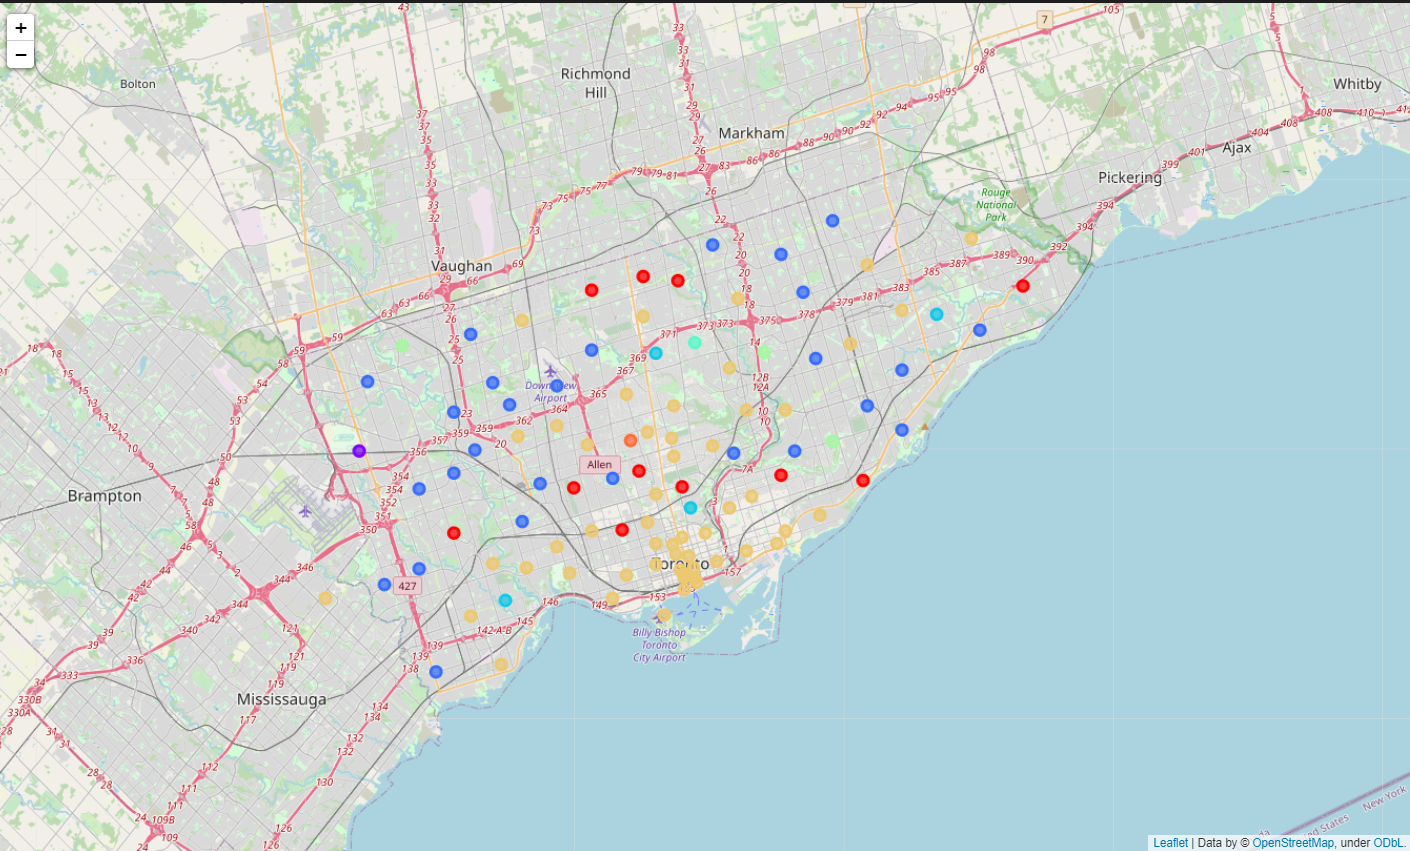

In [50]:
Image(filename= r"C:\Users\jose\Pictures\Screenshots\Screenshot (1942).png",  width=1400, height=900)

<!--
pd.set_option('display.max_rows', 150)
#to reset, use code below
#pd.reset_option('all')
toronto_merge
--!>

<p>Clusters shown below are those with the most number of data.

It can be seen that most clusters are divided by their main attribute. However there are still refininements required to be done. 

For the clusters below, it can be observed that:
<ul>
    <li>Cluster 1 focuses on Retail</li>
    <li>Cluster 3 focuses on Restaurants</li>
    <li>Cluster 4 focuses on parks</li>
    <li>Cluster 7 focuses on coffee stores</li>
</ul>
 </p>

<h3>Cluster 1</h3>

In [51]:
toronto_merge.loc[toronto_merge['ClusterLabel'] == 0, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

Borough  ClusterLabel 1st Most Common Venue  \
1        Scarborough           0.0        Breakfast Spot   
9        Scarborough           0.0       Thai Restaurant   
19        North York           0.0   Japanese Restaurant   
21        North York           0.0                  Park   
24        North York           0.0           Coffee Shop   
36         East York           0.0          Skating Rink   
48   Central Toronto           0.0         Grocery Store   
64   Central Toronto           0.0         Jewelry Store   
74              York           0.0                  Park   
75  Downtown Toronto           0.0                  Park   
93         Etobicoke           0.0              Pharmacy   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
1                    Bar     Italian Restaurant          Burger Joint   
9        College Stadium  General Entertainment                  Café   
19                  Bank                   Café    Chinese Restaurant   
21           Coffee Shop            Pizza Place        Sandwich Place   
24         Grocery Store                Butcher                  Park   
36                  Park             Beer Store    Athletics & Sports   
48  Gym / Fitness Center                   Park       Thai Restaurant   
64      Asian Restaurant               Bus Line      Sushi Restaurant   
74         Women's Store                    Gym   Sporting Goods Shop   
75         Grocery Store                   Café           Coffee Shop   
93         Grocery Store           Skating Rink                  Café   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1            Music Venue           Opera House                Office   
9           Skating Rink                  Park                 Diner   
19          Skating Rink          Intersection         Grocery Store   
21                 Trail                  Bank     Indian Restaurant   
24           Pizza Place              Pharmacy           Opera House   
36              Bus Line           Video Store                   Spa   
48   Japanese Restaurant        Sandwich Place                 Trail   
64                 Trail  Gym / Fitness Center            Nail Salon   
74            Beer Store                  Bank                Bakery   
75     Indian Restaurant                   Gym            Baby Store   
93                  Park                  Bank         Shopping Mall   

        8th Most Common Venue            9th Most Common Venue  \
1                Noodle House                        Nightclub   
9                   Nightclub                     Optical Shop   
19              Shopping Mall                    Movie Theater   
21                     Museum  Molecular Gastronomy Restaurant   
24                     Office                     Noodle House   
36                Curling Ice                      Yoga Studio   
48                        Gym                      Candy Store   
64               Optical Shop                      Opera House   
74        Japanese Restaurant                    Grocery Store   
75  Latin American Restaurant                      Candy Store   
93                 Playground                    Movie Theater   

     10th Most Common Venue  
1   New American Restaurant  
9               Opera House  
19          Organic Grocery  
21              Opera House  
24                Nightclub  
36  New American Restaurant  
48                     Café  
64                   Office  
74       Mexican Restaurant  
75              Karaoke Bar  
93  New American Restaurant

<h3>Cluster 3</h3>

In [52]:
toronto_merge.loc[toronto_merge['ClusterLabel'] == 2, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

Borough  ClusterLabel 1st Most Common Venue  \
2     Scarborough           2.0  Fast Food Restaurant   
5     Scarborough           2.0        Ice Cream Shop   
6     Scarborough           2.0           Coffee Shop   
8     Scarborough           2.0           Pizza Place   
11    Scarborough           2.0          Burger Joint   
13    Scarborough           2.0  Fast Food Restaurant   
14    Scarborough           2.0    Chinese Restaurant   
15    Scarborough           2.0           Pizza Place   
17     North York           2.0           Coffee Shop   
28     North York           2.0           Coffee Shop   
30     North York           2.0         Grocery Store   
31     North York           2.0         Grocery Store   
32     North York           2.0         Grocery Store   
33     North York           2.0         Grocery Store   
35      East York           2.0           Pizza Place   
39      East York           2.0     Indian Restaurant   
73           York           2.0             Gastropub   
80           York           2.0     Convenience Store   
81   Toronto/York           2.0               Brewery   
89      Etobicoke           2.0           Pizza Place   
94      Etobicoke           2.0           Pizza Place   
95      Etobicoke           2.0           Coffee Shop   
97     North York           2.0     Convenience Store   
98           York           2.0     Convenience Store   
99      Etobicoke           2.0           Pizza Place   
100     Etobicoke           2.0           Coffee Shop   
101     Etobicoke           2.0         Grocery Store   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2                  Pizza Place            Sports Bar           Coffee Shop   
5                  Coffee Shop            Restaurant  Fast Food Restaurant   
6                   Hobby Shop     Convenience Store                  Bank   
8                  Wings Joint            Restaurant    Chinese Restaurant   
11   Middle Eastern Restaurant           Pizza Place    Seafood Restaurant   
13           Convenience Store           Pizza Place              Pharmacy   
14                Intersection             BBQ Joint  Fast Food Restaurant   
15        Fast Food Restaurant           Coffee Shop    Chinese Restaurant   
17                 Pizza Place                  Bank                Bakery   
28                 Pizza Place                  Bank     Health Food Store   
30       Vietnamese Restaurant              Pharmacy           Coffee Shop   
31       Vietnamese Restaurant              Pharmacy           Coffee Shop   
32       Vietnamese Restaurant              Pharmacy           Coffee Shop   
33       Vietnamese Restaurant              Pharmacy           Coffee Shop   
35        Fast Food Restaurant        Breakfast Spot                  Bank   
39                 Coffee Shop     Afghan Restaurant        Sandwich Place   
73           Convenience Store            Bagel Shop                  Park   
80                 Gas Station             Wine Shop        Discount Store   
81                 Pizza Place    Athletics & Sports           Coffee Shop   
89           Convenience Store           Coffee Shop                  Park   
94          Mexican Restaurant                 Hotel               Theater   
95                 Gas Station     Convenience Store           Pizza Place   
97              Discount Store        Baseball Field           Gas Station   
98                 Pizza Place         Jewelry Store   Fried Chicken Joint   
99                 Coffee Shop        Discount Store           Gas Station   
100             Sandwich Place           Gas Station            Beer Store   
101                Pizza Place  Fast Food Restaurant  Caribbean Restaurant   

    5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
2              Beer Store             Restaurant        Breakfast Spot   
5          Sandwich Place            Pizza Place     Convenience Store   
6     

<h3>Cluster 4</h3>

In [53]:
toronto_merge.loc[toronto_merge['ClusterLabel'] == 3, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

Borough  ClusterLabel 1st Most Common Venue  \
3        Scarborough           3.0           Coffee Shop   
23        North York           3.0                  Park   
50  Downtown Toronto           3.0                  Park   
91         Etobicoke           3.0         Auto Workshop   

   2nd Most Common Venue       3rd Most Common Venue 4th Most Common Venue  \
3                   Park            Business Service           Yoga Studio   
23     Convenience Store                Tennis Court           Yoga Studio   
50                 Trail                  Playground  Gym / Fitness Center   
91                  Park  Construction & Landscaping     Convenience Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3   Other Great Outdoors          Optical Shop           Opera House   
23                Office          Noodle House             Nightclub   
50           Candy Store           Yoga Studio           Music Venue   
91           Yoga Studio           Music Venue           Opera House   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3                    Office          Noodle House              Nightclub  
23  New American Restaurant            Nail Salon            Music Venue  
50                   Office          Noodle House              Nightclub  
91                   Office          Noodle House              Nightclub

<h3>Cluster 7</h3>

In [54]:
toronto_merge.loc[toronto_merge['ClusterLabel'] == 6, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

Borough  ClusterLabel 1st Most Common Venue  \
0        Scarborough           6.0           Coffee Shop   
4        Scarborough           6.0     Indian Restaurant   
10       Scarborough           6.0     Electronics Store   
12       Scarborough           6.0        Discount Store   
18        North York           6.0           Coffee Shop   
22        North York           6.0           Coffee Shop   
26        North York           6.0                   Gym   
27        North York           6.0                   Gym   
29        North York           6.0           Coffee Shop   
34        North York           6.0           Coffee Shop   
37      East Toronto           6.0                   Pub   
38         East York           6.0           Coffee Shop   
40         East York           6.0           Pizza Place   
41      East Toronto           6.0      Greek Restaurant   
42      East Toronto           6.0     Indian Restaurant   
43      East Toronto           6.0           Coffee Shop   
44   Central Toronto           6.0      Business Service   
45   Central Toronto           6.0           Pizza Place   
46   Central Toronto           6.0           Coffee Shop   
47   Central Toronto           6.0    Italian Restaurant   
49   Central Toronto           6.0           Coffee Shop   
51  Downtown Toronto           6.0           Coffee Shop   
52  Downtown Toronto           6.0           Coffee Shop   
53  Downtown Toronto           6.0           Coffee Shop   
54  Downtown Toronto           6.0           Coffee Shop   
55  Downtown Toronto           6.0                  Café   
56  Downtown Toronto           6.0           Coffee Shop   
57  Downtown Toronto           6.0           Coffee Shop   
58  Downtown Toronto           6.0           Coffee Shop   
59  Downtown Toronto           6.0           Coffee Shop   
60  Downtown Toronto           6.0                 Hotel   
61  Downtown Toronto           6.0           Coffee Shop   
62        North York           6.0           Coffee Shop   
65   Central Toronto           6.0           Coffee Shop   
66  Downtown Toronto           6.0                  Café   
67  Downtown Toronto           6.0                  Café   
68  Downtown Toronto           6.0       Harbor / Marina   
69  Downtown Toronto           6.0           Coffee Shop   
70  Downtown Toronto           6.0                 Hotel   
71        North York           6.0   Arts & Crafts Store   
72        North York           6.0         Grocery Store   
76      West Toronto           6.0           Coffee Shop   
77      West Toronto           6.0                   Bar   
78      West Toronto           6.0           Coffee Shop   
79        North York           6.0         Garden Center   
82      West Toronto           6.0                  Café   
83      West Toronto           6.0                   Bar   
84      West Toronto           6.0                  Café   
85  Downtown Toronto           6.0           Coffee Shop   
86       Mississauga           6.0           Coffee Shop   
87      East Toronto           6.0  Fast Food Restaurant   
88         Etobicoke           6.0              Pharmacy   
90         Etobicoke           6.0        Breakfast Spot   
92         Etobicoke           6.0  Gym / Fitness Center   

    2nd Most Common Venue      3rd Most Common Venue  \
0    Fast Food Restaurant                      Trail   
4             Coffee Shop                Yoga Studio   
10                 Bakery          Indian Restaurant   
12             Restaurant  Latin American Restaurant   
18         Clothing Store                  Juice Bar   
22            Pizza Place          Korean Restaurant   
26    Japanese Restaurant                 Restaurant   
27    Japanese Restaurant                 Restaurant   
29            Pizza Place             Massage Studio   
34           Hockey Arena      Portuguese Restaurant   
37         Breakfast Spot        Japanese Restaurant   
38      Electronics Store     Furniture 

<h1>Thank you!</h1>